# Iris Species

*LUQUIENS, Guillaume*

## Our Data Science plan :

- 1.Problem Description
- 2.Loaded Data
- 3.Data Management
- 4.Basic Visualization
- 5.Split training and testing
- 6.Model Analysis
- 7.Machine Learning Algorithm Optimisation

# 1. Problem Description

The Iris dataset was used in R.A. Fisher's classic 1936 paper, The Use of Multiple Measurements in Taxonomic Problems, and can also be found on the UCI Machine Learning Repository.

It includes three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.

# 2. Dataset

This dataset is available in the Kaggle web site, not as a competition. Here is the link to load the train and test datasets : https://www.kaggle.com/uciml/iris

# 3. Data management

## 3.1. Librairies needed

To be able to load the datasets, make the basic vizualisation and improve our predictions, we first need to specify which library is going to be usefull. Those librairies can several time being used for diffent datasets.

### Array and data frame librairies

In [1]:
import numpy as np
import pandas as pd

### Data Modeling analysis

In [2]:
#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

# Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.plotting import scatter_matrix

# Configure visualizations
%matplotlib inline
mpl.style.use( 'ggplot' )
sns.set_style( 'white' )
pylab.rcParams[ 'figure.figsize' ] = 12 , 6

## 3.2. Data Description

In [3]:
# a dataset should be broken into 3 splits: train, test, and (final) validation
# but the splits aren't already done as we have only one dataset .csv file available.

# load the data
data = pd.read_csv('data/Iris.csv')

#preview data
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB
None


So, there are no null elements in all the data frame

In [4]:
data.describe(include='all')

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,NaN,50
mean,75.500000,5.843333,3.054000,3.758667,1.198667,NaN
std,43.445368,0.828066,0.433594,1.764420,0.763161,NaN
min,1.000000,4.300000,2.000000,1.000000,0.100000,NaN
25%,38.250000,5.100000,2.800000,1.600000,0.300000,NaN
50%,75.500000,5.800000,3.000000,4.350000,1.300000,NaN
75%,112.750000,6.400000,3.300000,5.100000,1.800000,NaN


# 4. Basic Vizualisation

## 4.1. The label prediction

We can first focus on the parameter we want to predict. We have here a supervised prediction of the Iris Species.

Number of flowers: 150


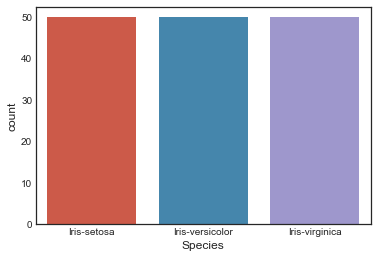

In [5]:
# let's check the number of flowers

print("Number of flowers:", data['Species'].count())
sns.countplot(x='Species', data=data);



We can see that the number of flowers for each Species is the same. As 150 rows are integrated to the dataframe, it means we can have 50 flowers of each Specie.

## 4.2. Features check

**Features Density and Values**

In [6]:
data_features = data.drop(['Species'], axis=1)

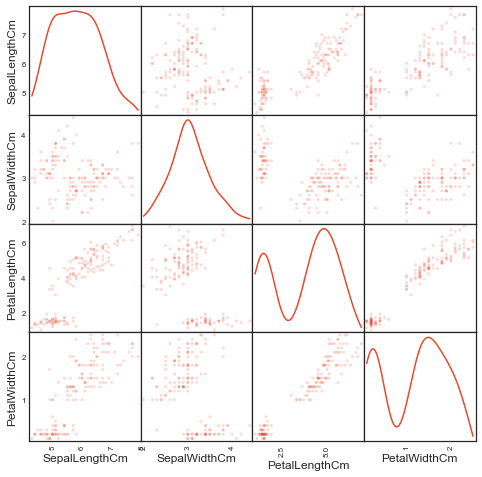

In [7]:
scatter_matrix(data.get(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']), alpha=0.2,
               figsize=(8, 8), diagonal='kde');

The intersting elements of this mattrix are that Sepal density is very homogenuos. No log function for instance isn't needed. Petal are even more intersting : we seem to have two very different length and width groups. 

We can try to compare some of those features for each Species

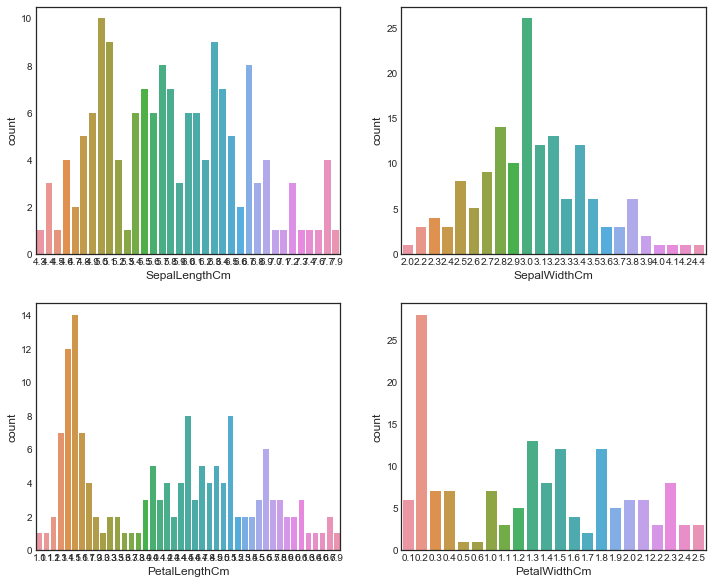

In [8]:
sns.set_palette('Dark2') # A matplotlib colormap relevant for categorical values

fig1, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, figsize=(12,10))
sns.countplot(x='SepalLengthCm', data=data, ax=ax1)
sns.countplot(x='SepalWidthCm', data=data, ax=ax2)
sns.countplot(x='PetalLengthCm', data=data, ax=ax3)
sns.countplot(x='PetalWidthCm', data=data, ax=ax4);

We can see that this plot is more usefull for classes with less values, and no coninuous.

In this way, we can so focus on continuous ways to analyse.

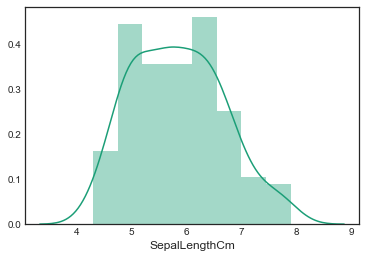

In [9]:
sns.distplot(data['SepalLengthCm'].dropna());

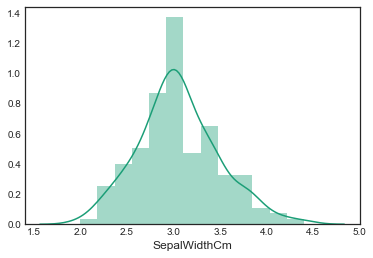

In [10]:
sns.distplot(data['SepalWidthCm'].dropna());

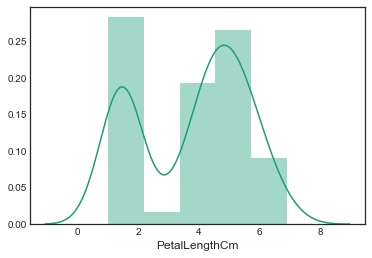

In [11]:
sns.distplot(data['PetalLengthCm'].dropna());

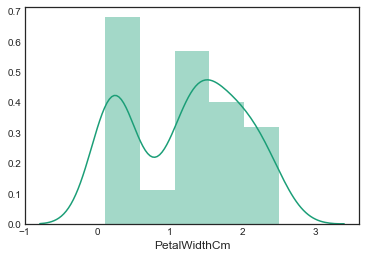

In [12]:
sns.distplot(data['PetalWidthCm'].dropna());

We have so those Petal close to 0, let's see how we can have this analysis 

**Features values for the Species**

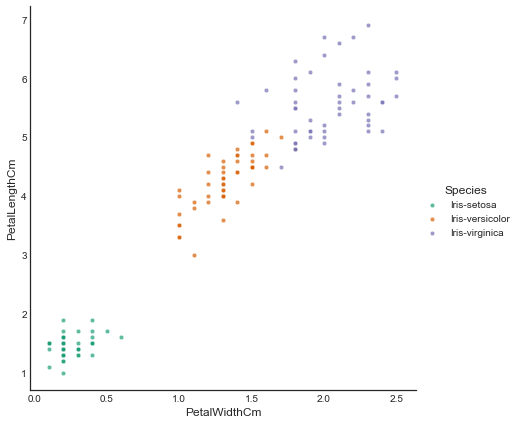

In [13]:
Petal = sns.FacetGrid(data, hue='Species', size=6)
Petal.map(plt.scatter, 'PetalWidthCm', 'PetalLengthCm', s=20, alpha=.7, linewidth=.5, edgecolor="white")
Petal.add_legend();

The Petal Cm are very elements linked to the Species classes.

Let's see what we can have for Sepal.

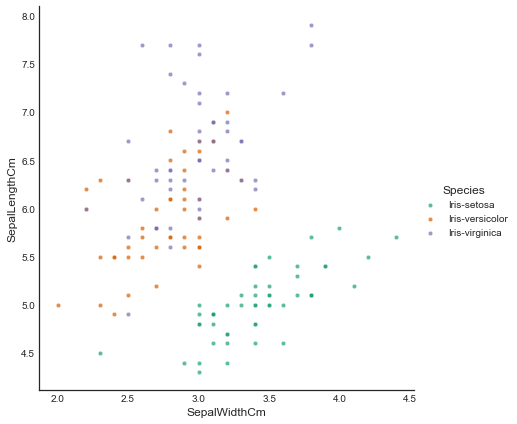

In [14]:
Sepal = sns.FacetGrid(data, hue='Species', size=6)
Sepal.map(plt.scatter, 'SepalWidthCm', 'SepalLengthCm', s=20, alpha=.7, linewidth=.5, edgecolor="white")
Sepal.add_legend();

With the Sepal measures, the class Iris-setosa is once more different than the two else Species. But Iris-versicolor and Iris-virginica are very close on those.

**Variables correlation**

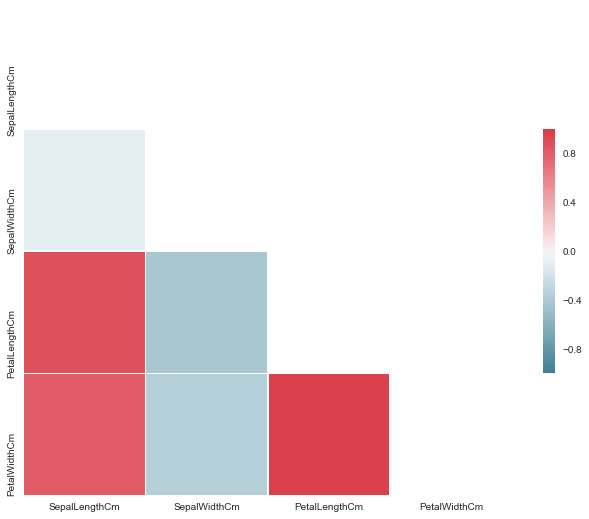

In [15]:
sns.set(style="white")

# The Iris dataset
d = data.drop(['Id'], axis=1)

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, vmin = -1.0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

We can see that the correlation for the two Petal measure have a very close to 1 correlation. And the length variable is the highest one. 

Sepal measures have correlation, but closer to 0. The width seems to be the more intersitng.

**3D visualiation with the more correlated features**

So, let's have a 3D plot with the more correlated variables, and with a color for the Species

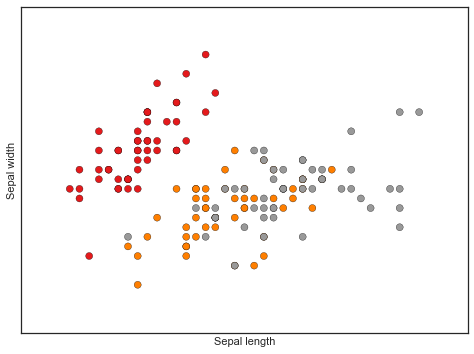

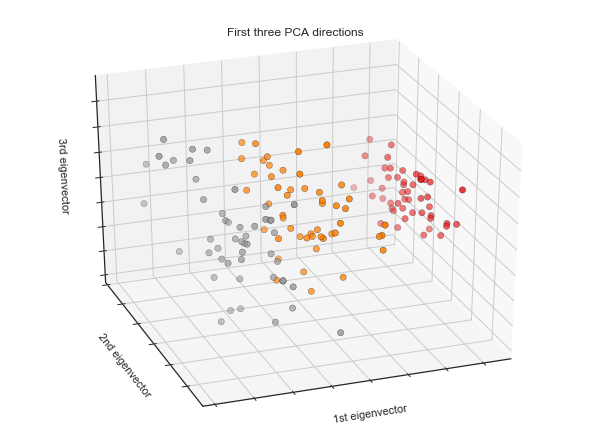

In [42]:
#print(__doc__)


# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

## 5. Split training and testing

In [47]:
# X definition (called data here)
features = data.drop(['Species'], axis=1)
X = features.values

# y definition (called target here)
species_column = data['Species']
y = species_column.values

In [48]:
from sklearn.model_selection import train_test_split
# replace model_selection by cross_validation for old version of scikit-learn

features_train, features_test, target_train, target_test = train_test_split(
    X, y, test_size=0.20, random_state=0)



## 6. Model Analysis

Many classifiers algoritms exist. We will start with the Logistci Regression. Then, we will compare the all classifiers scores.

### 6.1. Logistic Regression score

In [49]:
# we can start with a Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(C=1.)
logreg.fit(features_train, target_train)



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [50]:
target_predicted = logreg.predict(features_test)

In [51]:
from sklearn.metrics import accuracy_score

accuracy_score(target_test, target_predicted)

0.9333333333333333

This is a very good score, we have 93,3% accuracy with the LogisticRegression score

Let's make a cross validation, so we can be sure we don't have an overfitting error.

In [52]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(logreg, features, y, cv=6)
scores

array([0.88888889, 1.        , 1.        , 1.        , 0.91666667,
       0.66666667])

In [53]:
# We can use the accuracy scoring
scores = cross_val_score(logreg, features, y, cv=5, scoring='accuracy')
print("Logistic Regression CV scores:")
print("min: {:.4f}, mean: {:.4f}, max: {:.4f}, std: {:.4f}".format(
    scores.min(), scores.mean(), scores.max(), scores.std()))

Logistic Regression CV scores:
min: 0.7000, mean: 0.9133, max: 1.0000, std: 0.1127


### 6.2 Compare the different classifiers accuracy scores

So, we can see that the mean of the accuracy is a little bit higher after the cross-validation

Now, we can compare the accuracy scoring of different Machine Learning Algoritms. We will now use a cross-validation of 10.




In [56]:
MLA = [
    # Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(n_estimators = 100),

    # Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),
    
    # GLM
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(max_iter=1000, tol=None),
    linear_model. RidgeClassifierCV(),
    linear_model.SGDClassifier(max_iter=5, tol=None),
    linear_model.Perceptron(max_iter=5, tol=None),
    
    # Navies Bayes
    naive_bayes.GaussianNB(),
    
    # Nearest Neighbor
    neighbors.KNeighborsClassifier(n_neighbors = 3),
    
    # SVM
    svm.SVC(probability=True),
    svm.LinearSVC(),
    
    # Trees    
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    
    ]

# create the data frame to compare MLA
MLA_columns = ['MLA Name', 'MLA Parameters','MLA Train Accuracy', 'MLA Test Accuracy', 'MLA Time']
MLA_compare = pd.DataFrame(columns = MLA_columns)


# index through MLA and save performance to table
row_index = 0
for alg in MLA:

    # set name and parameters
    MLA_compare.loc[row_index, 'MLA Name'] = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())
    
    # score model with cross validation: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate
    cv_results = model_selection.cross_validate(alg, features, y, cv  = 10, return_train_score=True)
    MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
    MLA_compare.loc[row_index, 'MLA Train Accuracy'] = cv_results['train_score'].mean()
    MLA_compare.loc[row_index, 'MLA Test Accuracy'] = cv_results['test_score'].mean()   

    MLA[row_index] = alg.fit (features, y) #fit model for submission

    row_index+=1

# print and sort table
MLA_compare.sort_values(by = ['MLA Test Accuracy'], ascending = False, inplace = True)
# print(MLA_compare)
MLA_compare


,MLA Name,MLA Parameters,MLA Train Accuracy,MLA Test Accuracy,MLA Time
8,RidgeClassifierCV,"{'alphas': (0.1, 1.0, 10.0), 'class_weight': N...",1,1,0.00628746
6,LogisticRegressionCV,"{'Cs': 10, 'class_weight': None, 'cv': None, '...",1,1,0.84328
2,ExtraTreesClassifier,"{'bootstrap': False, 'class_weight': None, 'cr...",1,0.993333,0.0148288
11,GaussianNB,{'priors': None},0.993333,0.993333,0.00211959
4,RandomForestClassifier,"{'bootstrap': True, 'class_weight': None, 'cri...",1,0.98,0.181051
16,ExtraTreeClassifier,"{'class_weight': None, 'criterion': 'gini', 'm...",1,0.973333,0.00297074
1,BaggingClassifier,"{'base_estimator': None, 'bootstrap': True, 'b...",1,0.966667,0.0202191
3,GradientBoostingClassifier,"{'criterion': 'friedman_mse', 'init': None, 'l...",1,0.966667,0.18223
0,AdaBoostClassifier,"{'algorithm': 'SAMME.R', 'base_estimator': Non...",1,0.966667,0.105943
5,GaussianProcessClassifier,"{'copy_X_train': True, 'kernel': None, 'max_it...",1,0.96,0.0469456


Text(0,0.5,'Algorithm')

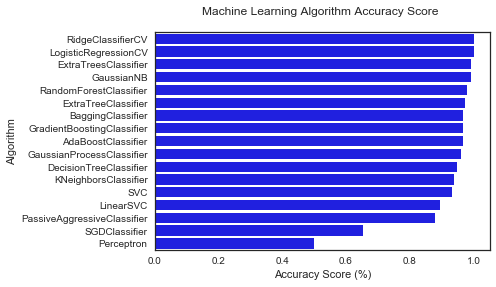

In [57]:
#MLA_compare.describe()
#barplot using https://seaborn.pydata.org/generated/seaborn.barplot.html
sns.barplot(x='MLA Test Accuracy', y = 'MLA Name', data = MLA_compare, color = 'b')

#prettify using pyplot: https://matplotlib.org/api/pyplot_api.html
plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)')
plt.ylabel('Algorithm')

# 7. Algorithm optimisation

We can see that we are close to the perfect prediction of the Species with a lot of Machine Learning algorithms. 

So, optimisation is not needed !